## Scénario
Aujourd’hui est un grand jour, vous commencez votre mission chez BottleNeck, un marchand de vin très prestigieux. 
Le responsable du projet vous explique les enjeux de votre première mission :

 “Actuellement, pour gérer nos ressources, nos clients, etc., on utilise un ERP qui n’est absolument pas relié à notre site de vente en ligne. Pour être tout à fait honnête, les outils en place sont vraiment artisanaux et dans ces conditions, la gestion des stocks est vraiment complexe et notre visibilité en termes d’analyse des ventes sur le Net est vraiment réduite, car très peu de personnes ont accès au back-office. En attendant une solution plus centralisée, un rapprochement entre les 2 bases, même manuel, pourrait être très utile…

Ta première mission se passe en 3 points.

* Premièrement, j’ai besoin que tu rapproches deux exports : un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...), il sont présentées pers les deux fichiers (1.xls, 2.xlsx). En plus de ces 2 exports, tu vas bénéficier d’une aide précieuse car Sylvie, notre ancienne stagiaire, a réalisé un travail de fourmi. Elle a créé un tableau Excel qui permet d’établir le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU) les données sont présentées par le fichier 3.xls ( En fait, la colonne id_web dans son fichier correspond au SKU des produits dans la boutique en ligne.)

* Deuxièmement, une fois le rapprochement effectué, je souhaiterais avoir le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.

* Troisièmement et pour finir, je me demande s’il n’y a pas eu des erreurs de saisie dans certains prix des produits. J'aimerais que tu effectues une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.

**Nous voudrions présenter tes résultats lors de la prochaine réunion de COPIL. Cela permettrait de montrer nos progrès. Je peux t’épargner le travail d’une présentation par slides, il me faut juste un notebook que tu présenteras à l’assemblée pour expliquer ta démarche.**”

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
df_erp = pd.read_excel('data/1.xlsx')
df_inter = pd.read_excel('data/2.xlsx')
df_sku = pd.read_excel('data/3.xlsx')

C:\Users\utilisateur\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [225]:
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [226]:
df_merge = pd.merge(df_erp, df_inter, on='product_id', how="left")
df_merge.shape

(825, 6)

In [227]:
df_merge.rename(columns={'id_web': 'sku'}, inplace=True)
df_sku.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [228]:
df_merge = pd.merge(df_merge, df_sku, on='sku', how="left")
df_merge.drop_duplicates(subset=['sku'], keep='first', inplace=True)

In [229]:
df_merge.shape

(735, 33)

<span style="color: orange;">Maintenant que nous avons fusionnés nos Dataframe, nous allons rajouter une nouvelle colonne **Chiffre d'affaire**</span>

In [230]:
df_merge["CA"] = df_merge["total_sales"] * df_merge["price"]
df_merge["CA"] = df_merge["CA"].astype(float)

In [231]:
df_merge["CA"]

0       145.2
2         0.0
4         0.0
6        42.3
8         0.0
        ...  
6794      0.0
6796      0.0
9178      0.0
9180      NaN
9181      0.0
Name: CA, Length: 735, dtype: float64

In [232]:
ca_total = df_merge['CA'].sum()

print(f"Le chiffre d'affaire total est de {ca_total} €")

Le chiffre d'affaire total est de 70568.6 €


In [233]:
df_merge.to_excel('data/data_produit.xlsx', index=False)

<span style="color: orange;">Nous allons maintenant vérifier les **Outliers** et les **Valeurs Manquantes** afin d'avoir le Dataframe le plus pertinent possible.</span>

In [234]:
df_merge.dtypes

product_id                        int64
onsale_web                        int64
price                           float64
stock_quantity                    int64
stock_status                     object
sku                              object
virtual                         float64
downloadable                    float64
rating_count                    float64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]


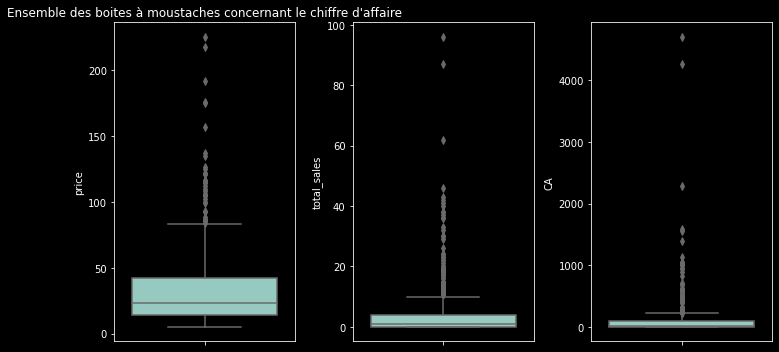

In [235]:
names = ['price', 'total_sales', 'CA']


fig, axes = plt.subplots(1,len(names), figsize=(10,5))

for i,t in enumerate(names):
    sns.boxplot(data=df_merge, y=t, ax=axes[i % len(names)])

axes[0].set_title("Ensemble des boites à moustaches concernant le chiffre d'affaire")

plt.tight_layout()
plt.show()

<span style="color: orange;">Après l'études des différents prix, il est difficile de trouver des **Outliers aberrant** étant donné que les seuls outliers sont des valeurs **atypiques**.</span>

## Conclusion

<span style="color: lightgreen;">Nous pouvons conclure notre étude comme quoi l'ensemble des prix semble correct. Si nous voulons poursuivre l'étude, il serait pertinent de faire différents graphiques sur l'évolution du chiffre d'affaires et le nombre de ventes sur les nouveaux produits ainsi qu'un nettoyage du Dataframe à son maximum.</span>